# **PREPARATION**

---

## **Load Library**

In [2]:
# Required libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn import metrics
from datetime import datetime
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression

# For evaluating the model performance
from sklearn.metrics import classification_report, confusion_matrix



> **silhouette library**



In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## **Load Dataset**

In [4]:
# Buat fungsi untuk transform url csv
def transform_url(url):
  trf_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  return trf_url

In [5]:
# Masukkan dataset
isp_churn_url = transform_url('https://drive.google.com/file/d/1V7CLMgS2eXVMzghuYWaBXKE3fFEfJm9I/view?usp=share_link')
df_isp_churn = pd.read_csv(isp_churn_url)
df_isp_churn

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


# **Data Cleaning**

---

In [6]:
# Buat copy dataset
df_isp_churn1 = df_isp_churn.copy()

## **Removing Irrelevant Values**

In [7]:
# Cek info 
df_isp_churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [8]:
# Drop kolom ID karena tidak dibutuhkan
df_isp_churn1.drop('id', axis = 1, inplace = True)

for col in df_isp_churn1.columns:
  print(col)

is_tv_subscriber
is_movie_package_subscriber
subscription_age
bill_avg
reamining_contract
service_failure_count
download_avg
upload_avg
download_over_limit
churn


In [9]:
# Cek nilai min subscription age
df_isp_churn1['subscription_age'].min()

-0.02

In [10]:
# Hapus nilai -0.02 dari data subscription age
df_isp_churn1 = df_isp_churn1[df_isp_churn1.subscription_age != -0.02]

df_isp_churn1['subscription_age'].min()

0.0

## **Handling Missing Data**

In [11]:
# Cek null di tiap kolom
df_isp_churn1.isna().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [12]:
# Isi blank values pada reamining_contract dengan 0
df_isp_churn1['reamining_contract'] = df_isp_churn1['reamining_contract'].fillna(0)

# Pada download_avg & upload_avg, drop 381 blank values
df_isp_churn1.dropna(axis=0,inplace=True)
df_isp_churn1.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

## **Removing Duplicates**

In [13]:
# Cek duplikat
duplicate = df_isp_churn1[df_isp_churn1.duplicated()]
duplicate

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
37,0,0,5.62,0,0.0,0,0.0,0.0,0,1
39,0,0,5.62,0,0.0,0,0.0,0.0,0,1
43,0,0,5.62,0,0.0,0,0.0,0.0,0,1
59,0,0,5.62,0,0.0,0,0.0,0.0,0,1
71,0,0,5.62,0,0.0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
71998,1,1,0.61,0,0.0,0,0.0,0.0,0,1
72071,1,0,0.00,0,0.0,0,0.0,0.0,0,1
72134,0,0,0.00,0,0.0,0,0.0,0.0,0,1
72263,1,0,0.02,0,0.0,0,0.0,0.0,0,1


In [14]:
# Hapus 2324 data duplikat
df_isp_churn1.drop_duplicates(keep=False, inplace=True)

# Cek kembali data duplikat
df_isp_churn1.duplicated().sum()

0

## **String Manipulation**

In [15]:
# Koreksi typo pada reamining contract
df_isp_churn1.rename(columns = {'reamining_contract':'remaining_contract'}, inplace=True)

data = df_isp_churn1
for col in data.columns:
  print(col)

is_tv_subscriber
is_movie_package_subscriber
subscription_age
bill_avg
remaining_contract
service_failure_count
download_avg
upload_avg
download_over_limit
churn


## **Handling Outlier**

In [16]:
# Define fungsi baru 
def boxplot_(var):
  plt.figure(figsize = (10,7))
  sns.boxplot(y = var, data = df_isp_churn1, x = 'churn', palette = 'ch:start=.2,rot=-.3')
  plt.show()

> **subscription age**

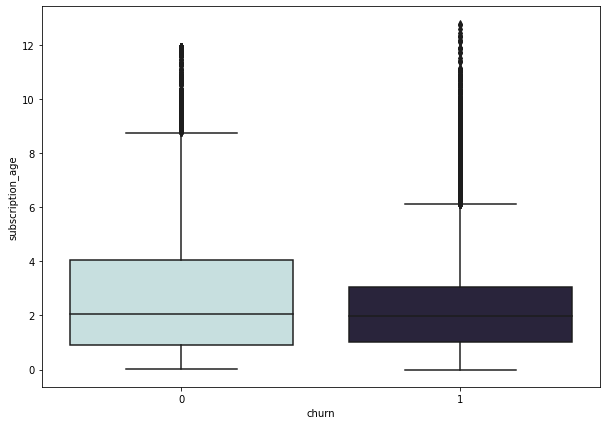

In [17]:
# Cek outlier
boxplot_('subscription_age')

> **bill avg**

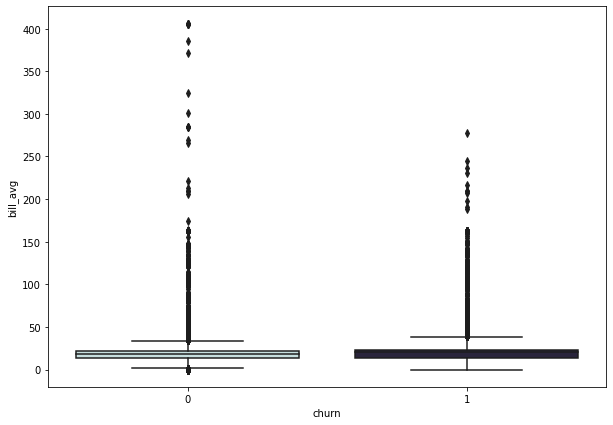

In [18]:
# Cek outlier
boxplot_('bill_avg')

> **download avg**

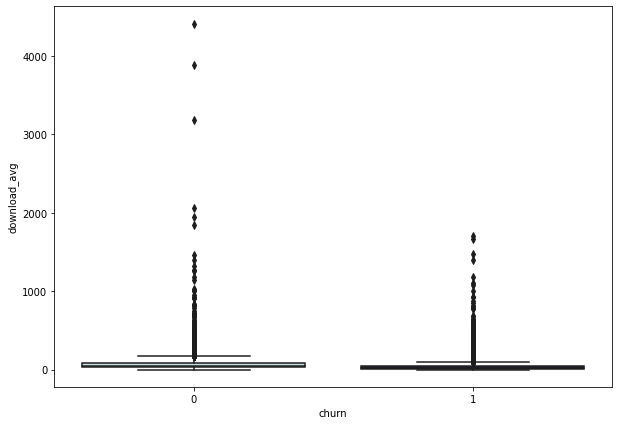

In [19]:
# Cek outlier
boxplot_('download_avg')

> **upload avg**

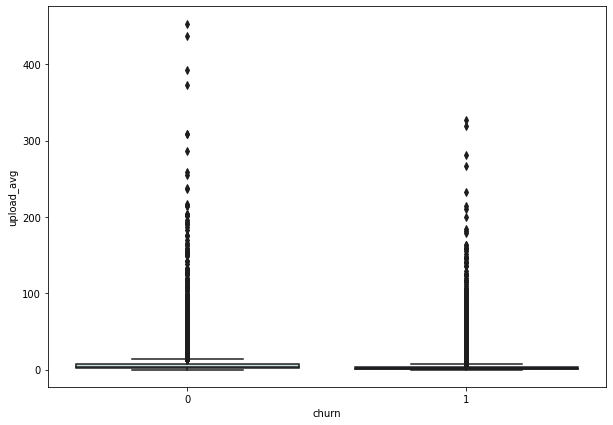

In [20]:
# Cek outlier
boxplot_('upload_avg')

- Dari keempat kolom ini, terlihat bahwa semua kolom memiliki cukup banyak outlier. Kita akan menangani outlier ini pada tahap EDA.

> **copy clean dataset**

In [21]:
# Copy clean dataset untuk export ke csv
ispchurn_clean = df_isp_churn1.copy()

# **Exploratory Data Analysis**

---

## **Descriptive Statistics**

### **How much customers are already churned?**

[]

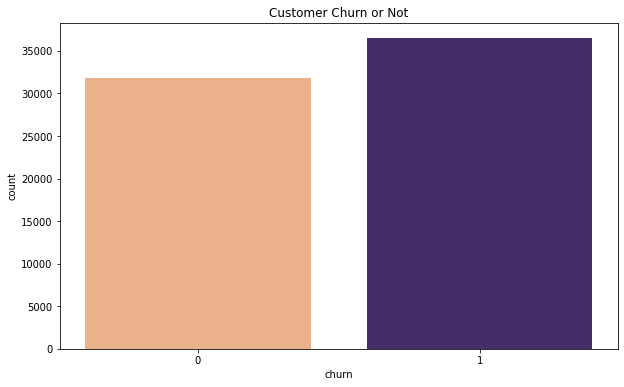

In [22]:
# Cek berapa banyak customer yang sudah churn
plt.figure(figsize = (10,6))
plt.title('Customer Churn or Not')
sns.countplot(data = df_isp_churn1, x = 'churn', palette=['#FAAE7B',"#432371"])
plt.plot()

In [23]:
# Cek value counts pada churn
df_isp_churn1['churn'].value_counts()

1    36499
0    31843
Name: churn, dtype: int64

- Di sini terlihat bahwa terdapat imbalance data walau tidak terlalu signifikan. Customer yang churn lebih banyak dibanding mereka yang bertahan.

In [24]:
# Periksa total customer pada tv & movie package
subs = df_isp_churn1[["is_tv_subscriber","is_movie_package_subscriber"]].sum()
subs

is_tv_subscriber               56953
is_movie_package_subscriber    23564
dtype: int64

In [25]:
# Lakukan group by 
df_isp_churn1.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

is_tv_subscriber  is_movie_package_subscriber
0                 0                              11387
                  1                                  2
1                 0                              33391
                  1                              23562
Name: is_movie_package_subscriber, dtype: int64

- Dari sini, kita dapat melihat bahwa hanya terdapat 2 customer yang hanya berlangganan pada movie package.

- Customer yang tidak berlanganan pada tv & movie package berjumlah 11387. Sebaliknya, customer yang berlangganan keduanya berjumlah 23562.

### **Is tv causing churn?**

[]

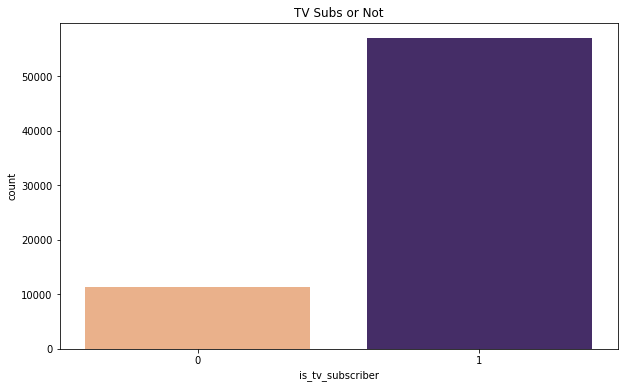

In [26]:
# Cek berapa banyak customer yang sudah churn pada tv subscription
plt.figure(figsize = (10,6))
plt.title('TV Subs or Not')
sns.countplot(data = df_isp_churn1, x = 'is_tv_subscriber', palette=['#FAAE7B',"#432371"])
plt.plot()

In [27]:
#  Cek value counts pada tv subscription
df_isp_churn1['is_tv_subscriber'].value_counts()

1    56953
0    11389
Name: is_tv_subscriber, dtype: int64

- Customer yang berlangganan pada tv ternyata lebih banyak yang akhirnya memilih churn.
- Jadi, dapat dikatakan jika tv subs merupakan faktor penting dalam penyebab churn.

### **Is movie package causing churn?**

[]

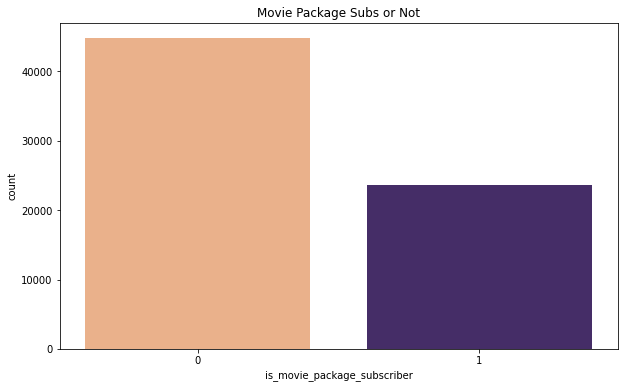

In [28]:
# Cek berapa banyak customer yang sudah churn pada movie package subscription
plt.figure(figsize = (10,6))
plt.title('Movie Package Subs or Not')
sns.countplot(data = df_isp_churn1, x = 'is_movie_package_subscriber', palette=['#FAAE7B',"#432371"])
plt.plot()

In [29]:
#  Cek value counts pada tv subscription
df_isp_churn1['is_movie_package_subscriber'].value_counts()

0    44778
1    23564
Name: is_movie_package_subscriber, dtype: int64

- Pada movie package subs, customer yang churn terlihat lebih sedikit dibanding mereka yang bertahan.
- Sehingga, movie package subs bukan merupakan faktor penting pada penyebab churn.

In [30]:
# Lakukan group by
df_isp_churn1.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['churn']].agg(['sum'])

churn
                                                sum
is_tv_subscriber is_movie_package_subscriber       
0                0                            10069
                 1                                2
1                0                            18688
                 1                             7740

- Customer yang berlangganan baik pada tv & movie package memiliki tingkat churn lebih rendah
- Customer yang tidak berlangganan baik pada tv & movie packege memiliki tingkat churn yang lebih tinggi.

### **Do customer churn less with higher subscription year?**

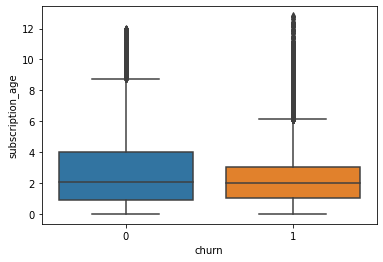

In [31]:
# Cek boxplot
sns.boxplot(x="churn",y="subscription_age",data=df_isp_churn1)
plt.show() 

- Customer yang tidak churn memiliki usia yang terletak diantara 1 hingga 4 tahun. Selain itu, juga terlihat data outlier yang usianya terletak di atas 9 tahun.
- Di lain sisi, customer yang churn usianya terletak di range 1 hingga 3 tahun. Selain itu, juga terlihat data outlier yang usianya terletak di atas 6 tahun.


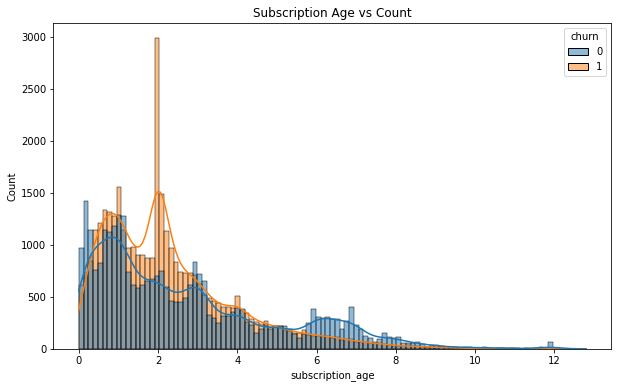

In [32]:
# Buat histogram subs age vs count
plt.figure(figsize = (10,6))
sns.histplot(data = df_isp_churn1, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

- Histogram ini memastikan bahwa mayoritas umur customer terletak diantara 0 sampai 4 tahun. Di lain sisi, customer dengan umur berlangganan yang tinggi lebih sedikit. 
- Dari sisi churn, terlihat churn tinggi pada usia dengan range 0 hingga 4 tahun. 
- Sehingga, subscription age adalah faktor penting dalam memprediksi churn.

### **Is the bill average of customer causing churn?**

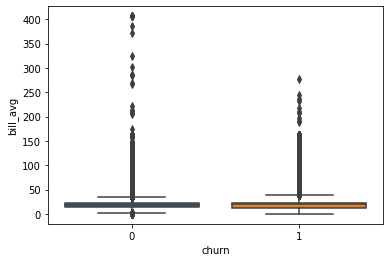

In [33]:
# Cek boxplot
sns.boxplot(x="churn",y="bill_avg",data=df_isp_churn1)
plt.show() 

- Bill average baik pada customer yang churn maupun tidak, terletak di range 0-40 dollar. 
- Di luar itu, baik pada customer yang churn maupun tidak, keduanya memiliki outlier yang terletak mulai dari range 40 - >400 dollar.

In [34]:
# Lakukan group by
df_isp_churn1.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['bill_avg','churn']].agg(['sum'])

bill_avg  churn
                                                  sum    sum
is_tv_subscriber is_movie_package_subscriber                
0                0                             258966  10069
                 1                                 28      2
1                0                             624241  18688
                 1                             443376   7740

- Customer yang tak berlangganan pada tv & movie package memiliki bill average yang rendah walaupun dengan churn rate yang terbilang tinggi.
- Customer yang hanya berlangganan pada tv memiliki bill average tertinggi dengan churn rate yang tertinggi diantara yang lain.
- Customer yang berlangganan keduanya memiliki churn rate yang paling rendah.
- Sehingga, disimpulkan jika bill average ini merupakan faktor penting penyebab customer churn.

### **Is remaining contract effect on churn?**

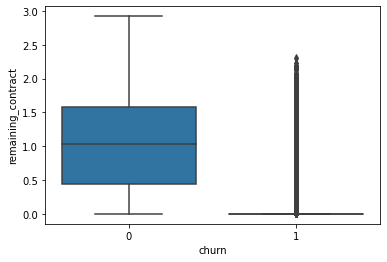

In [35]:
# Cek boxplot
sns.boxplot(x="churn",y="remaining_contract",data=df_isp_churn1)
plt.show() 

- Di sini terlihat jika customer yang tak memiliki kontrak adalah mereka yang churn. Ini dikarenakan jika mereka membatalkan contract, mereka akan terkena penalti.

### **Is the service failure count of customer effect on churn?**

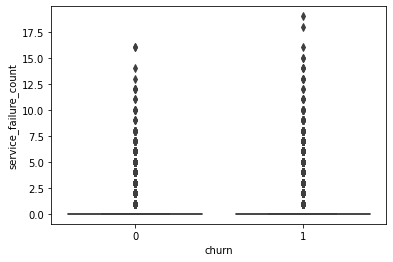

In [36]:
# Cek boxplot
sns.boxplot(x="churn",y="service_failure_count",data=df_isp_churn1)
plt.show() 

In [37]:
# Cek kolom service failure count
print(df_isp_churn1['service_failure_count'].unique())
print(df_isp_churn1['service_failure_count'].value_counts())

[ 0  1  2  6  4 10  5  3  8  7 11  9 13 14 15 19 18 12 16]
0     56561
1      7600
2      2434
3       901
4       393
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
19        1
18        1
Name: service_failure_count, dtype: int64


- Selanjutnya, mari periksa menggunakan count plot berapa banyak customer yang gagal menelpon CS lebih dari 6x dalam kurun waktu 3 bulan terakhir.

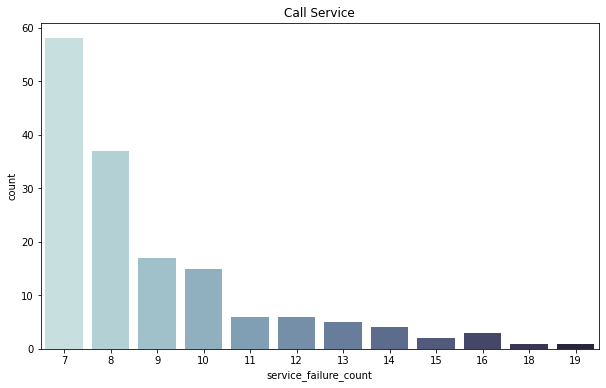

In [38]:
# Periksa service failure count yang > 6
data = df_isp_churn1[df_isp_churn1['service_failure_count'] > 6]
plt.figure(figsize = (10,6))
plt.title('Call Service')
sns.countplot(data = data, x = 'service_failure_count', 
              palette = 'ch:start=.2,rot=-.3')
plt.show()

- Terlihat bahwa hanya sedikit customer yang menelpon leih dari 6x dalam 3 bulan terakhir, ini berarti bahwa mayoritas dari mereka tidak menelpon terlalu sering.
- Sehingga, mari kita periksa mereka yang menelpon kurang dari 6x dalam 3 bulan terakhir.

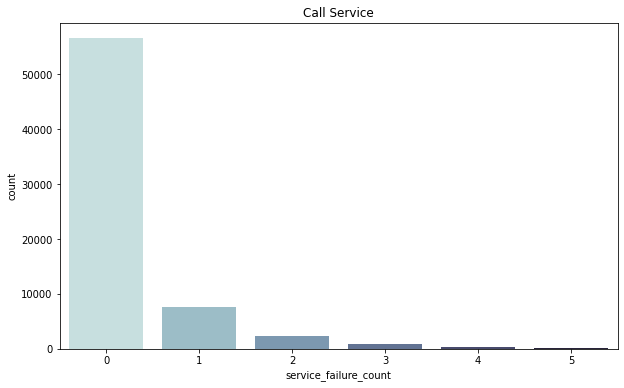

In [39]:
# Periksa service failure count yang < 6
data = df_isp_churn1[df_isp_churn1['service_failure_count'] < 6]
plt.figure(figsize = (10,6))
plt.title('Call Service')
sns.countplot(data = data, x = 'service_failure_count', 
              palette = 'ch:start=.2,rot=-.3')
plt.show()

- Dari sini terlihat jelas jika mayoritas customer tidak menelpon CS dalam 3 bulan terakhir ini. Jikapun ada, rata-rata customer hanya menelpon sekali saja.

### **Is download average of customer causing churn?**

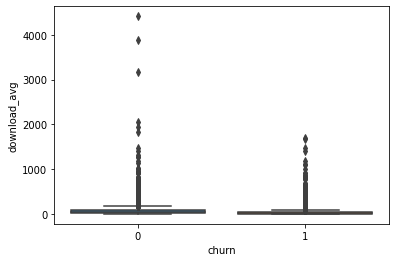

In [40]:
# Cek boxplot
sns.boxplot(x="churn",y="download_avg",data=df_isp_churn1)
plt.show() 

- Download average belum terlihat sebagai faktor penting dalam prediksi churn, namun akan kita cek kembali pada matriks korelasi.

### **Is upload average of customer leading to churn?**

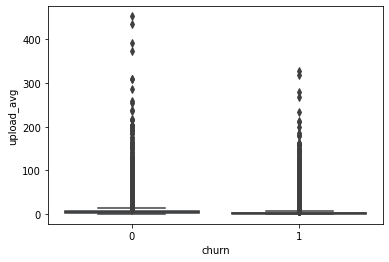

In [41]:
# Cek boxplot
sns.boxplot(x="churn",y="upload_avg",data=df_isp_churn1)
plt.show() 

- Upload average belum terlihat sebagai faktor penting dalam prediksi churn, namun akan kita cek kembali pada matriks korelasi.

In [42]:
# Lakukan group by
df_isp_churn1.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['download_avg','upload_avg','churn']].agg(['sum'])

download_avg upload_avg  churn
                                                      sum        sum    sum
is_tv_subscriber is_movie_package_subscriber                               
0                0                               347346.5    37655.6  10069
                 1                                   83.2        5.7      2
1                0                              1398966.6   131990.3  18688
                 1                              1394483.2   131722.4   7740

- Baik customer yang hanya berlangganan pada tv serta mereka yang berlangganan pada tv & movie package, keduanya memiliki penggunaan data tertinggi dibanding lainnya.

### **Is download over limit of customer leading to churn?**

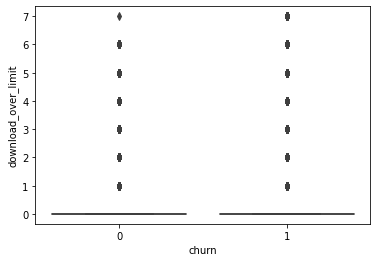

In [43]:
# Cek boxplot 
sns.boxplot(x="churn",y="download_over_limit",data=df_isp_churn1)
plt.show()

- Terlihat jika cukup banyak customer yang memiliki download over limit
- Namun, perlu diingat jika biasanya provider akan memberikan peringatan jika customer mencapai batas limit download, sehingga biasanya customer cukup aware akan hal ini.

# **Regression Analysis**

---

> **balance check**

[]

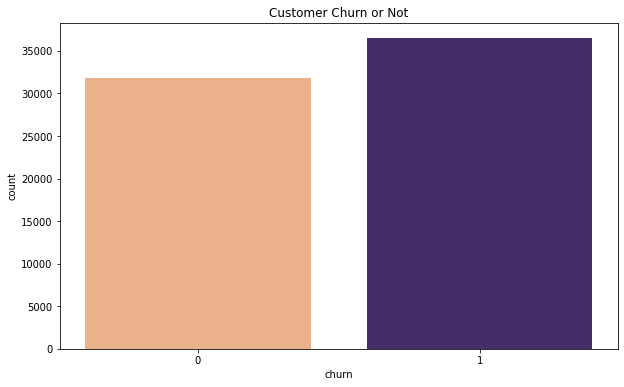

In [44]:
# cek apakah data imblance atau tidak
plt.figure(figsize = (10,6))
plt.title('Customer Churn or Not')
sns.countplot(data = df_isp_churn1, x = 'churn', palette=['#FAAE7B',"#432371"])
plt.plot()

- Walau hanya selisih yang sedikit, namun data masih termasuk dalam imbalance, sehingga diperlukan balance data ke depannya.


## **Correlation**

In [45]:
# Periksa sekilas korelasi pada tiap kolom
corr = df_isp_churn1.corr()
corr

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
is_tv_subscriber,1.000000,0.324232,0.072826,-0.112617,0.242543,-0.032335,0.107591,0.049210,-0.115828,-0.313945
is_movie_package_subscriber,0.324232,1.000000,0.123806,-0.032613,0.339812,0.006864,0.149362,0.085436,-0.032149,-0.298861
subscription_age,0.072826,0.123806,1.000000,0.049326,-0.037111,-0.005442,0.052544,0.019374,0.022547,-0.106857
bill_avg,-0.112617,-0.032613,0.049326,1.000000,-0.084836,0.092387,0.425890,0.330489,-0.234021,-0.000917
remaining_contract,0.242543,0.339812,-0.037111,-0.084836,1.000000,-0.018985,0.181880,0.089196,-0.123290,-0.671261
service_failure_count,-0.032335,0.006864,-0.005442,0.092387,-0.018985,1.000000,0.070950,0.064637,0.005767,0.034386
download_avg,0.107591,0.149362,0.052544,0.425890,0.181880,0.070950,1.000000,0.548536,-0.117164,-0.275250
upload_avg,0.049210,0.085436,0.019374,0.330489,0.089196,0.064637,0.548536,1.000000,-0.070330,-0.146661
download_over_limit,-0.115828,-0.032149,0.022547,-0.234021,-0.123290,0.005767,-0.117164,-0.070330,1.000000,0.163183
churn,-0.313945,-0.298861,-0.106857,-0.000917,-0.671261,0.034386,-0.275250,-0.146661,0.163183,1.000000


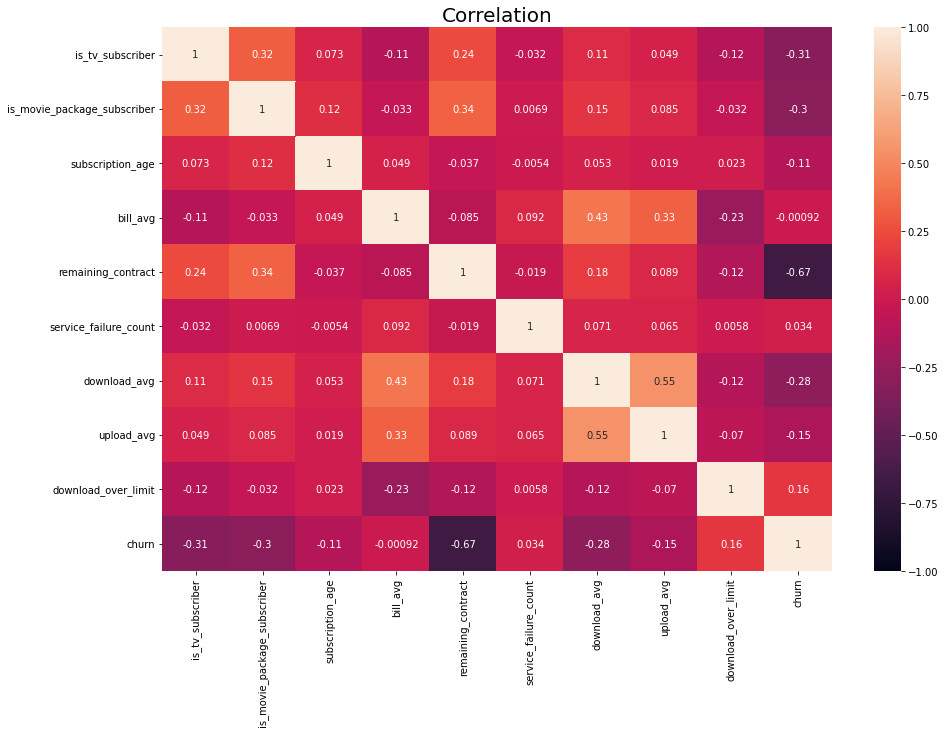

In [46]:
# Visualisasikan dengan heatmap
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Correlation', fontsize = 20)
ax = sns.heatmap(corr, vmin = -1, annot = True)
plt.show()

- Pada tahap ini, kita perlu memilih variabel yang ingin kita masukkan ke dalam model.
- Pilih variabel yang memiliki korelasi rendah dengan variabel target (churn).

## **Logistic Regression**

- Pisahkan data menjadi train & test part dengan 80% train, 20% test.
- Buat model pada data train.
- Validasi performa model pada data test.

In [47]:
# Define seluruh variabel
x = df_isp_churn1.iloc[:, 0:-1]
y = df_isp_churn1.iloc[:, -1]

# Pisah menjadi train & test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [48]:
# Cek hasil split
for df_isp_churn1 in [x_train, x_test, y_train, y_test]:
  print(df_isp_churn1.shape)

(54673, 9)
(13669, 9)
(54673,)
(13669,)


In [49]:
# Pastikan sudah terbagi 80:20
54673/(54673+13669)

0.7999912206256767

In [50]:
# Cek class balance dari tiap dataset
for df_isp_churn1 in [y_train,y_test]:
  df2 = df_isp_churn1.value_counts()
  print(df2)

1    29181
0    25492
Name: churn, dtype: int64
1    7318
0    6351
Name: churn, dtype: int64


In [51]:
# Lakukan class weight balanced agar hasil log reg tidak condong memprediksi ke churn
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

## **Confusion Matrix**

> **TRAIN Dataset**

In [52]:
# Cek akurasi dari prediksi model data train
model.score(x_train,y_train)

0.8689115285424249

- Pada train dataset, akurasi model menunjukkan angka 86.89%, sehingga dapat dikatakan jika model logistic regression ini memiliki performa yang bagus. 

In [53]:
# Bentuk confusion matrix (churn actual & churn prediksi)
confusion_matrix(y_train, model.predict(x_train))

array([[21188,  4304],
       [ 2863, 26318]])

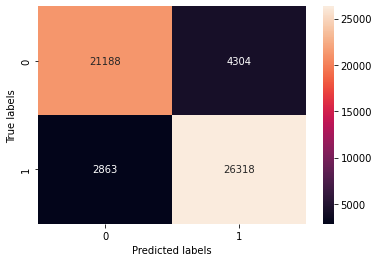

In [54]:
# Visualisasikan dengan heatmap
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train, model.predict(x_train)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [55]:
# Classification report
print(classification_report(y_train, model.predict(x_train), target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.88      0.83      0.86     25492
       Churn       0.86      0.90      0.88     29181

    accuracy                           0.87     54673
   macro avg       0.87      0.87      0.87     54673
weighted avg       0.87      0.87      0.87     54673



> **TEST Dataset**

In [56]:
# Cek akurasi dari model data test
model.score(x_test,y_test)

0.8716804448021069

- Pada test dataset, akurasi model menunjukkan angka 87.17%, sehingga dapat dikatakan jika model logistic regression ini memiliki performa yang bagus.

In [57]:
# Bentuk confusion matrix (churn actual & churn prediksi)
confusion_matrix(y_test, model.predict(x_test))

array([[5319, 1032],
       [ 722, 6596]])

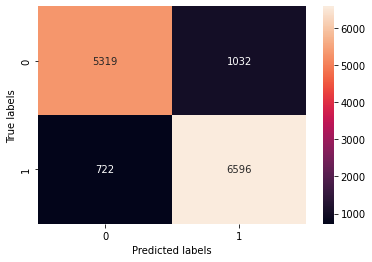

In [58]:
# Visualisasikan dengan heatmap
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [59]:
# Classification report
print(classification_report(y_test, model.predict(x_test), target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.88      0.84      0.86      6351
       Churn       0.86      0.90      0.88      7318

    accuracy                           0.87     13669
   macro avg       0.87      0.87      0.87     13669
weighted avg       0.87      0.87      0.87     13669



# **Conclusion**

---



- Berdasarkan pemodelan data menggunakan logistic regression, baik pada fase train maupun test memiliki akurasi yang kurang lebih sama, yakni 87%. Sehingga, dapat dikatakan bahwa model ini mampu memprediksi churn pada customer dengan baik.

# **User Segmentation**

---

In [60]:
# Copy dataset untuk standardisasi data
df_clustering = ispchurn_clean[['is_tv_subscriber','is_movie_package_subscriber','remaining_contract','download_avg','churn']].copy()
df_clustering

,is_tv_subscriber,is_movie_package_subscriber,remaining_contract,download_avg,churn
0,1,0,0.14,8.4,0
1,0,0,0.00,0.0,1
2,1,0,0.00,13.7,1
3,0,0,0.00,0.0,1
4,0,0,0.00,0.0,1
...,...,...,...,...,...
72269,1,1,1.25,0.0,1
72270,1,0,1.63,0.8,1
72271,1,0,2.19,1.5,1
72272,0,0,0.72,0.0,1


## **Standardize**

In [61]:
# Standardize dataset
scaler = MinMaxScaler()
std_data = df_clustering.copy()
std_data[:] = scaler.fit_transform(df_clustering[:])
std_data

,is_tv_subscriber,is_movie_package_subscriber,remaining_contract,download_avg,churn
0,1.0,0.0,0.047945,0.001903,0.0
1,0.0,0.0,0.000000,0.000000,1.0
2,1.0,0.0,0.000000,0.003103,1.0
3,0.0,0.0,0.000000,0.000000,1.0
4,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...
72269,1.0,1.0,0.428082,0.000000,1.0
72270,1.0,0.0,0.558219,0.000181,1.0
72271,1.0,0.0,0.750000,0.000340,1.0
72272,0.0,0.0,0.246575,0.000000,1.0


## **Determine Cluster Number**

> **Elbow Method**

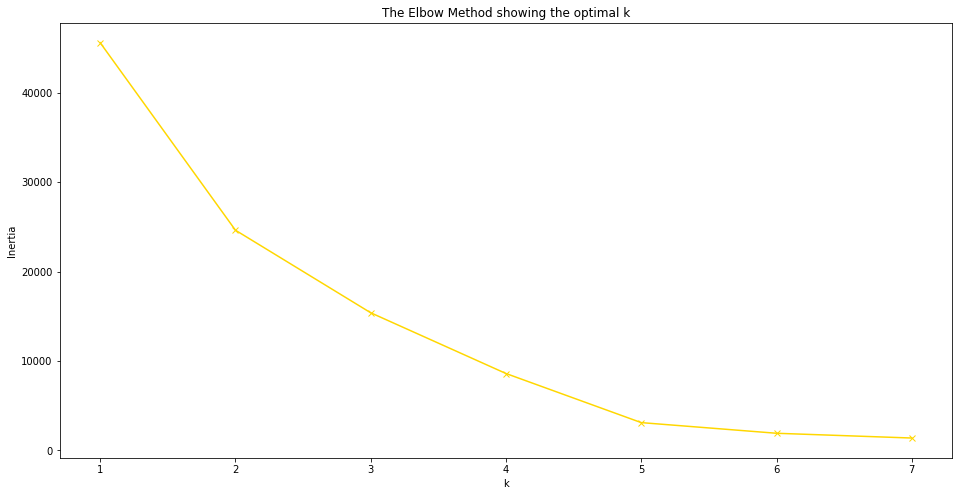

In [62]:
# cek nilai K dengan elbow method
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(std_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-',color='gold')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('The Elbow Method showing the optimal k.jpg')
plt.show()

- Dengan elbow method, cluster terbaik terdapat pada K=2. Gunakan silhouette method untuk lebih memastikan. 

> **Silhouette Method**

For n_clusters = 2 The average silhouette_score is : 0.4937898719361248
For n_clusters = 3 The average silhouette_score is : 0.5825878989528237
For n_clusters = 4 The average silhouette_score is : 0.6929948832180556


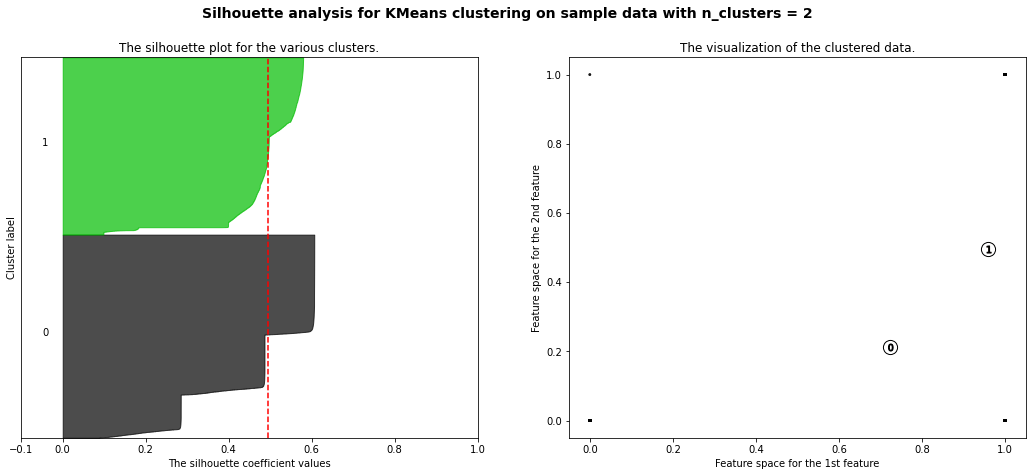

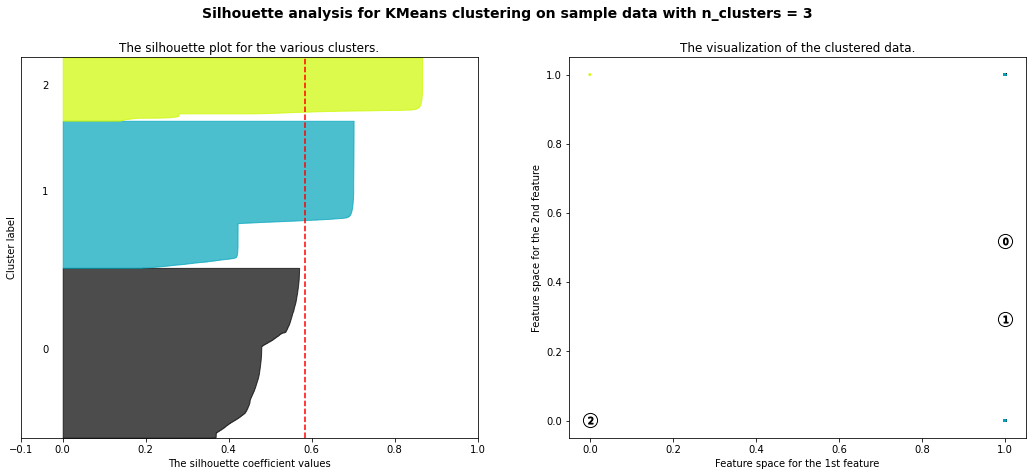

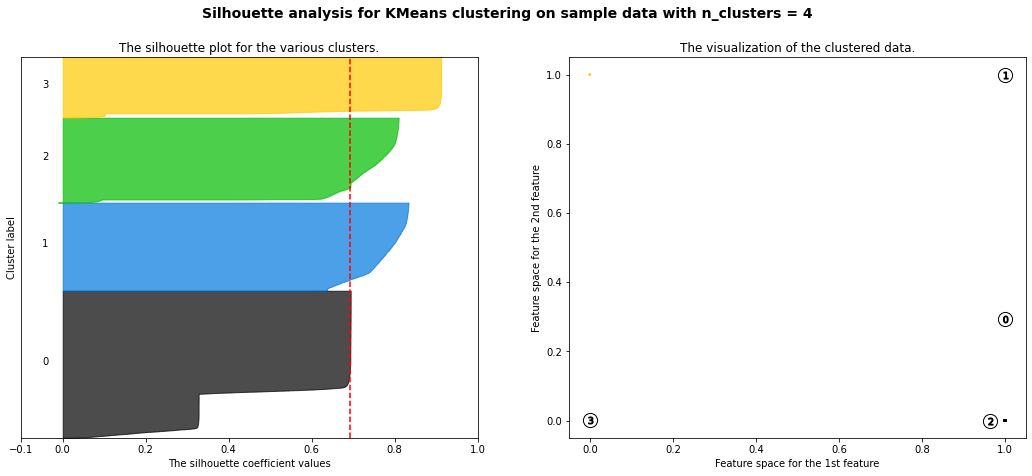

In [ ]:
# cek untuk mengetahui cluster terbaik
silhoutte_analysis(std_data,list(range(2,5)))

- Merujuk pada nilai k means dan distribusi data yang ada, maka cluster terbaik adalah 2 cluster.

## **Implement Clustering**

In [ ]:
# Masukkan cluster ke dalam dataset
cluster_model = cluster.KMeans(n_clusters=2)
cluster_model.fit(df_clustering)
cluster_label = cluster_model.labels_
df_clustering['cluster'] = cluster_label
df_clustering.sort_values('cluster', ascending=False)

,is_tv_subscriber,is_movie_package_subscriber,remaining_contract,download_avg,churn,cluster
0,1,0,0.14,8.4,0,1
46284,1,0,0.00,33.8,1,1
46267,1,1,0.31,26.2,0,1
46270,1,0,0.00,0.0,1,1
46271,1,1,1.32,62.0,0,1
...,...,...,...,...,...,...
11315,1,0,0.00,97.1,0,0
25857,1,0,0.00,109.0,1,0
59899,1,0,0.92,89.7,0,0
42900,1,0,0.98,90.1,0,0


## **Cluster Interpretation**

> **tv subscriber**

In [ ]:
df_clustering.groupby(['cluster','is_tv_subscriber'])[['churn']].agg(['sum'])

churn
                            sum
cluster is_tv_subscriber       
0       0                   538
        1                  2161
1       0                  9533
        1                 24267

> **movie package subscriber**

In [ ]:
df_clustering.groupby(['cluster','is_movie_package_subscriber'])[['churn']].agg(['sum'])

churn
                                       sum
cluster is_movie_package_subscriber       
0       0                             1756
        1                              943
1       0                            27001
        1                             6799

> **remaining contract**

In [ ]:
# Define df baru karena biar bisa export csv & baca datanya
rmc = df_clustering.groupby(['cluster','remaining_contract'])[['churn']].agg(['sum'])
rmc

churn
                             sum
cluster remaining_contract      
0       0.00                2138
        0.01                   3
        0.02                   3
        0.03                   5
        0.04                   3
...                          ...
1       2.78                   0
        2.79                   0
        2.84                   0
        2.87                   0
        2.92                   0

[470 rows x 1 columns]

> **download average**

In [ ]:
# Define df baru karena biar bisa export csv & baca datanya
dwl_avg = df_clustering.groupby(['cluster','download_avg'])[['churn']].agg(['sum'])
dwl_avg

churn
                       sum
cluster download_avg      
0       87.5             8
        87.6             9
        87.7             5
        87.8             8
        87.9            11
...                    ...
1       87.0            10
        87.1             7
        87.2             6
        87.3             3
        87.4             5

[2856 rows x 1 columns]

## **Segment Characteristics**

> **Cluster 0: High Risk Customer**

- Mayoritas mereka yang churn, berlangganan tv
- Mayoritas mereka yang churn, tidak berlangganan movie package
- Sebagian besar mereka yang churn, tidak memiliki contract (0 year)
- Sebagian besar mereka yang churn, tidak melakukan aktivitas download

> **Cluster 1: Regular Customer**

- Mayoritas mereka yang churn, berlangganan tv (walau tak sebanyak cluster 0)
- Mayoritas mereka yang churn, tidak berlangganan movie package (tak sebanyak cluster 0)
- Sebagian besar mereka yang churn, tak memiliki contract (0 year, tak sebanyak cluster 0)
- Customer yang churn merata pada setiap download average

# **Export to CSV**
---

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#ispchurn_clean.to_csv('ispchurn_clean.csv')
#rmc.to_csv('rmc_clustering.csv')
#dwl_avg.to_csv('dwlavg_clustering.csv')

In [ ]:
ispchurn_clean

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1
